In [1]:
# Descarga de los datos:

#!pip install gdown
#!gdown --id 1whdnMdI6qkW-0kypplMFnWB2VWxyHUFF -O dsp.zip

/home/seby/UPM/Signal/Images/imagen_medica/venv/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1whdnMdI6qkW-0kypplMFnWB2VWxyHUFF
From (redirected): https://drive.google.com/uc?id=1whdnMdI6qkW-0kypplMFnWB2VWxyHUFF&confirm=t&uuid=67a65706-b28a-4976-8a69-f071f4e7ab09
To: /home/seby/UPM/Signal/Images/imagen_medica/dsp.zip
100%|████████████████████████████████████████| 598M/598M [01:27<00:00, 6.82MB/s]


In [2]:
# Descomprimir datos
#! unzip -o dsp.zip

# <span style="color:pink"> AUTORES </span>
 
* **<span style="color:pink"> Sebastián Kay Conde Lorenzo </span>**
* **<span style="color:pink"> Francisco Manuel López López </span>**

# <span style="color:red">¿DÓNDE ENCONTRAR LAS IMÁGENES, NOTAS Y DEMÁS?</span>

**<span style="color:red">PARA ENCONTRAR EL PROYECTO COMPLETO DE ESTOS NOTEBOOKS (INCLUYENDO LA ESTRUCTURA DE CARPETAS E IMÁGENES USADAS) POR FAVOR VISITAR ESTE [REPOSITORIO](https://github.com/cbasitodx/Image_Processing_Course)**</span>

## Características de la convolución

Uso de la convolución y kernels para preprocesar una imagen y resaltar características de la imagen o utilizar los resultados como nuevas características de la imagen.

In [2]:
#!pip install pydicom
import numpy as np
import pydicom as dicom
import matplotlib.pyplot as plt
from skimage.transform import resize

In [3]:
def read_dicom(file_path):
    metadata = dicom.dcmread(file_path)
    image_data = metadata.pixel_array
    return metadata, image_data

Leer la imagen

/home/seby/UPM/Signal/Images/imagen_medica/venv/lib/python3.10/site-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: '04031e57794b9e8861e3c65e935f11d2'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 154
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 04031e57794b9e8861e3c65e935f11d2
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.3.4
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0010,0040) Patient's Sex                       CS: 'M'
(0010,1010) Patient's Age                       AS: '054Y'
(0028,0002) Samples per Pixel                   US: 1
(0028,0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028,0008) Number of Frames                    IS: '1'
(0028,0010) Rows                                US: 3072
(0028,0011) Columns                             US: 

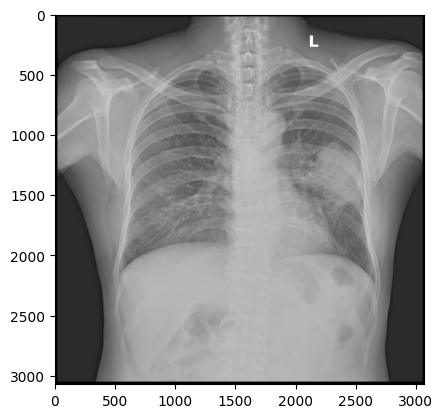

In [5]:
metadata, xray = read_dicom('imagenes/dsp/04031e57794b9e8861e3c65e935f11d2.dcm')
print(metadata)

plt.imshow(xray, cmap='gray')
plt.show()

In [6]:
def convolve(img: np.array, kernel: np.array) -> np.array:
  # Funtion for convolving an image with a kernel, it is not optimized

  # Dimensions of the image are reduced when convolution is applied
  # to avoid this, padding is used before convolution
  h = img.shape[0] - kernel.shape[0] + 1
  w = img.shape[1] - kernel.shape[1] + 1

  k_h, k_w  = kernel.shape[0], kernel.shape[1]

  # 2D array of zeros
  convolved_img = np.zeros(shape=(h, w))

  # Iterate over the rows
  for i in range(h):
    # Iterate over the columns
    for j in range(w):
      # img[i, j] = individual pixel value
      # Get the current matrix
      mat = img[i:i+k_h, j:j+k_w]

      # Apply the convolution - element-wise multiplication and summation of the result
      # Store the result to i-th row and j-th column of our convolved_img array
      convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
  return convolved_img

Vamos a realizar algún procesamiento de imágenes.

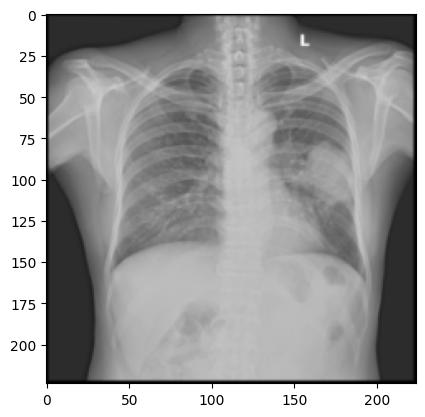

In [7]:
# We convert image into grayscale and normalize to [0,1] range
im = xray / np.max(xray)

im = resize(im, (224, 224)) # resize image to 224x224, it works also with RGB

plt.imshow(im, cmap='gray')
plt.show()

#### Kernel para extracción de bordes

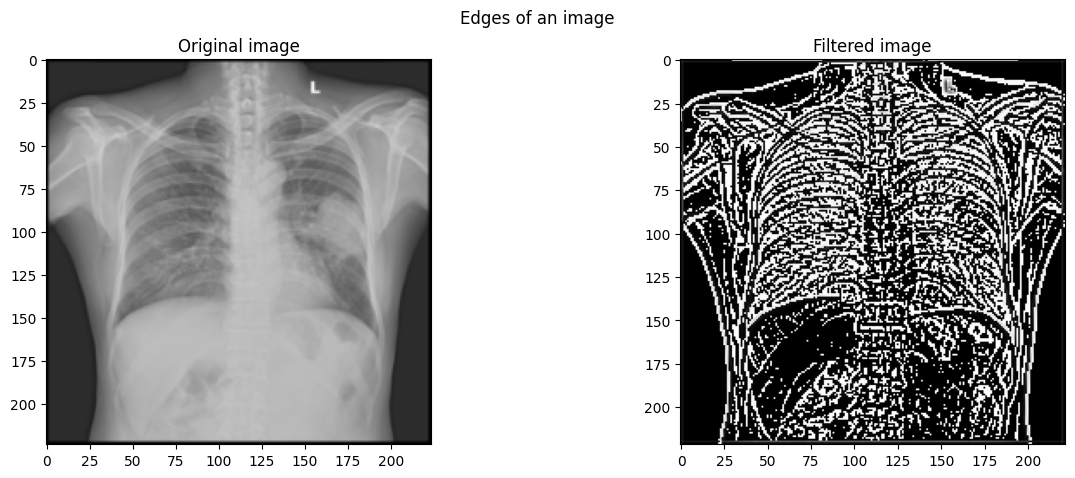

In [10]:
kernel = np.ones((3, 3)) * -1.0
kernel[1, 1] = 8.0

edges_img = convolve(im / 255, kernel)
# Normalize output image for visualization
edges_img = ((edges_img / edges_img.max()) * 255).astype(np.uint8)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Edges of an image')
ax1.imshow(im, cmap='gray')
ax1.set_title('Original image')
ax2.imshow(edges_img, cmap='gray')
ax2.set_title('Filtered image')
plt.show()

Otros kernels se pueden visualizar aquí: https://setosa.io/ev/image-kernels/

**Actividad 1**: Probar dos kernels, sobre la imagen original y otra con el contraste mejorado.

In [9]:
# TODO:

## Características de las redes neuronales convolucionales (CNN):

Las CNN siguen el mismo principio de convolución con los kernels que se muestran anteriormente. Sin embargo, los kernels son autoaprendidos. La red neuronal aprende los mejores kernels para extraer características.

In [13]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms, utils

import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os
import requests

try:
  from torchinfo import summary
except:
  !pip install -U torchinfo
  from torchinfo import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Enlace interesante para explorar redes neuronales convolucionales: https://poloclub.github.io/cnn-explainer/

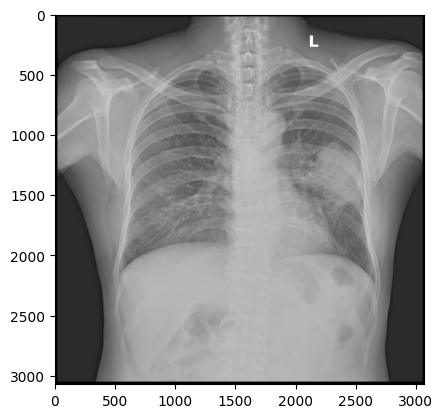

In [15]:
metadata, xray = read_dicom('imagenes/dsp/04031e57794b9e8861e3c65e935f11d2.dcm')
plt.imshow(xray, cmap='gray')
plt.show()

#### Preprocesado

In [17]:
def grayscale_to_rgb(img):
    img = np.repeat(np.expand_dims(img, -1), 3, axis=2) # Repeat grayscale channel 3 times
    return img

def preprocess_image(img):
    # preprocessing
    x = np.expand_dims(img, axis=0) # batch x width x height x channels
    x = np.rollaxis(x, 3, 1) # batch x channels x width x height
    x = x.astype(np.float32)
    # Normalize the image (mean 0 and std 1)
    x = x - x.mean()
    x = x / x.std()
    return x

img = grayscale_to_rgb(xray)

# image modifications


img = resize(xray, output_shape=(224, 224),
             preserve_range=True) # resize image
img = (img / np.max(img) * 255).astype(np.uint8)
img = grayscale_to_rgb(img)
x = preprocess_image(img)

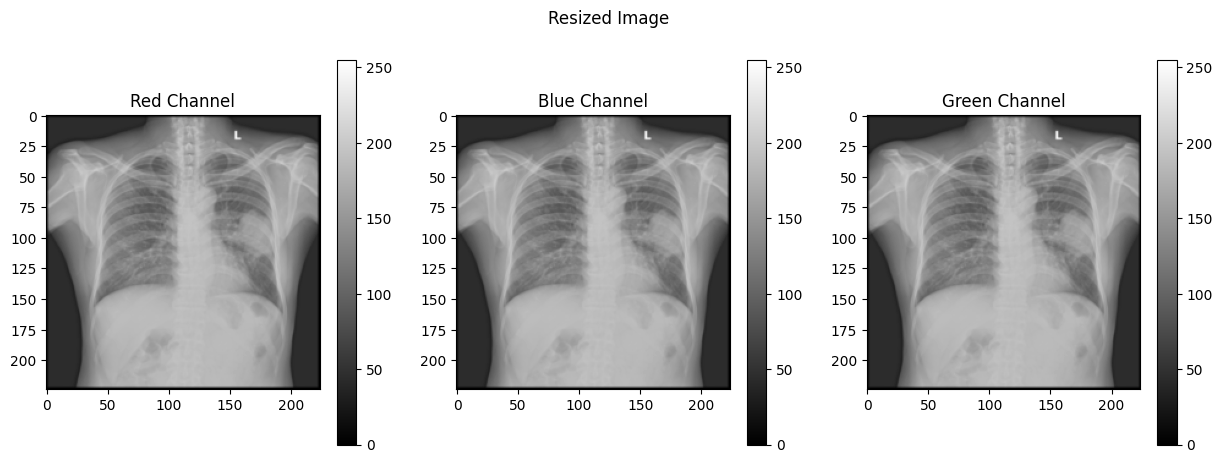

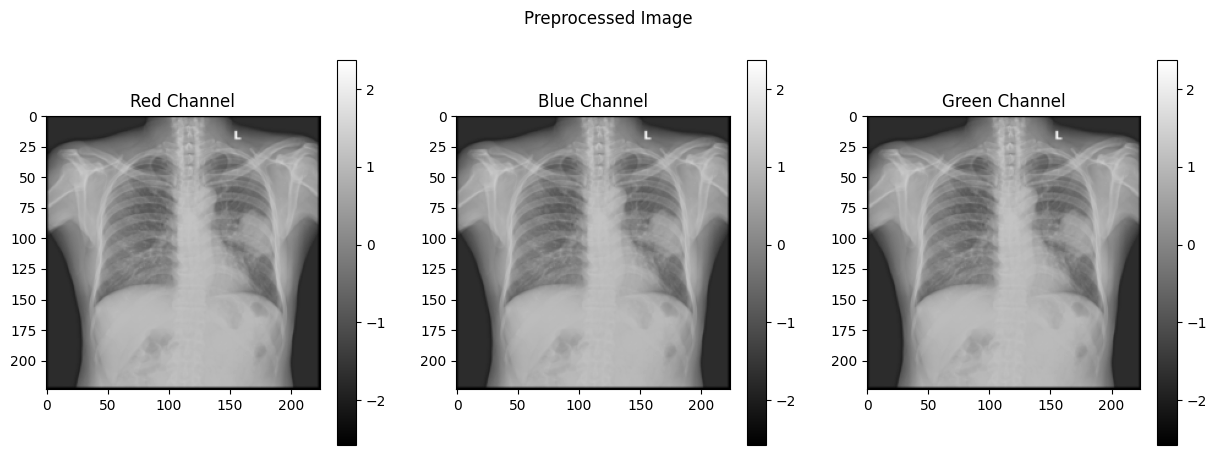

In [18]:
# Plot images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Resized Image')
im1 = ax1.imshow(img[:,:,0], cmap='gray')
plt.colorbar(im1, ax=ax1) # TODO: set the same scale
ax1.set_title('Red Channel')
im2 = ax2.imshow(img[:,:,1], cmap='gray', vmin=0, vmax=255)
plt.colorbar(im2, ax=ax2)
ax2.set_title('Blue Channel')
im3 = ax3.imshow(img[:,:,2], cmap='gray', vmin=0, vmax=255)
plt.colorbar(im3, ax=ax3)
ax3.set_title('Green Channel')
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Preprocessed Image')
im1 = ax1.imshow(np.squeeze(x)[0,:,:], cmap='gray')
plt.colorbar(im1, ax=ax1)
ax1.set_title('Red Channel')
im2 = ax2.imshow(np.squeeze(x)[1,:,:], cmap='gray')
plt.colorbar(im2, ax=ax2)
ax2.set_title('Blue Channel')
im3 = ax3.imshow(np.squeeze(x)[2,:,:], cmap='gray')
plt.colorbar(im3, ax=ax3)
ax3.set_title('Green Channel')
plt.show()

In [19]:
# Download pretrained model
model = models.vgg16(weights='DEFAULT')
model.eval()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/seby/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [01:29<00:00, 6.19MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [20]:
# Summarize structure of the network
summary(model, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1000]                 --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

### Filtros de Convolución

In [21]:
# Function to visualize the filters of a convolution layer
def filter_map(model, image, layer='conv_1'):
  layers = {'conv_1': 1, 'conv_2': 3, 'conv_3': 6,
          'conv_4': 8, 'conv_5': 11, 'conv_5': 13,
          'conv_6': 15, 'conv_7': 18, 'conv_8': 20,
          'conv_9': 22, 'conv_10': 25, 'conv_11': 27,
          'conv_12': 29}
  assert layer in layers, 'layer not found'

  filters = model.features[layers[layer] - 1].weight
  num_filters = filters.size(0) if filters.size(0) < 64 else 64
  plt.figure(figsize=(20, 20))
  for i in range(num_filters):
    plt.subplot(num_filters//8, 8, i+1)
    plt.imshow(filters[i, 0, :, :].detach().cpu().numpy(), cmap='viridis')
    plt.axis('off')
  plt.show()

Visualicemos los filtros de la primera convolución.

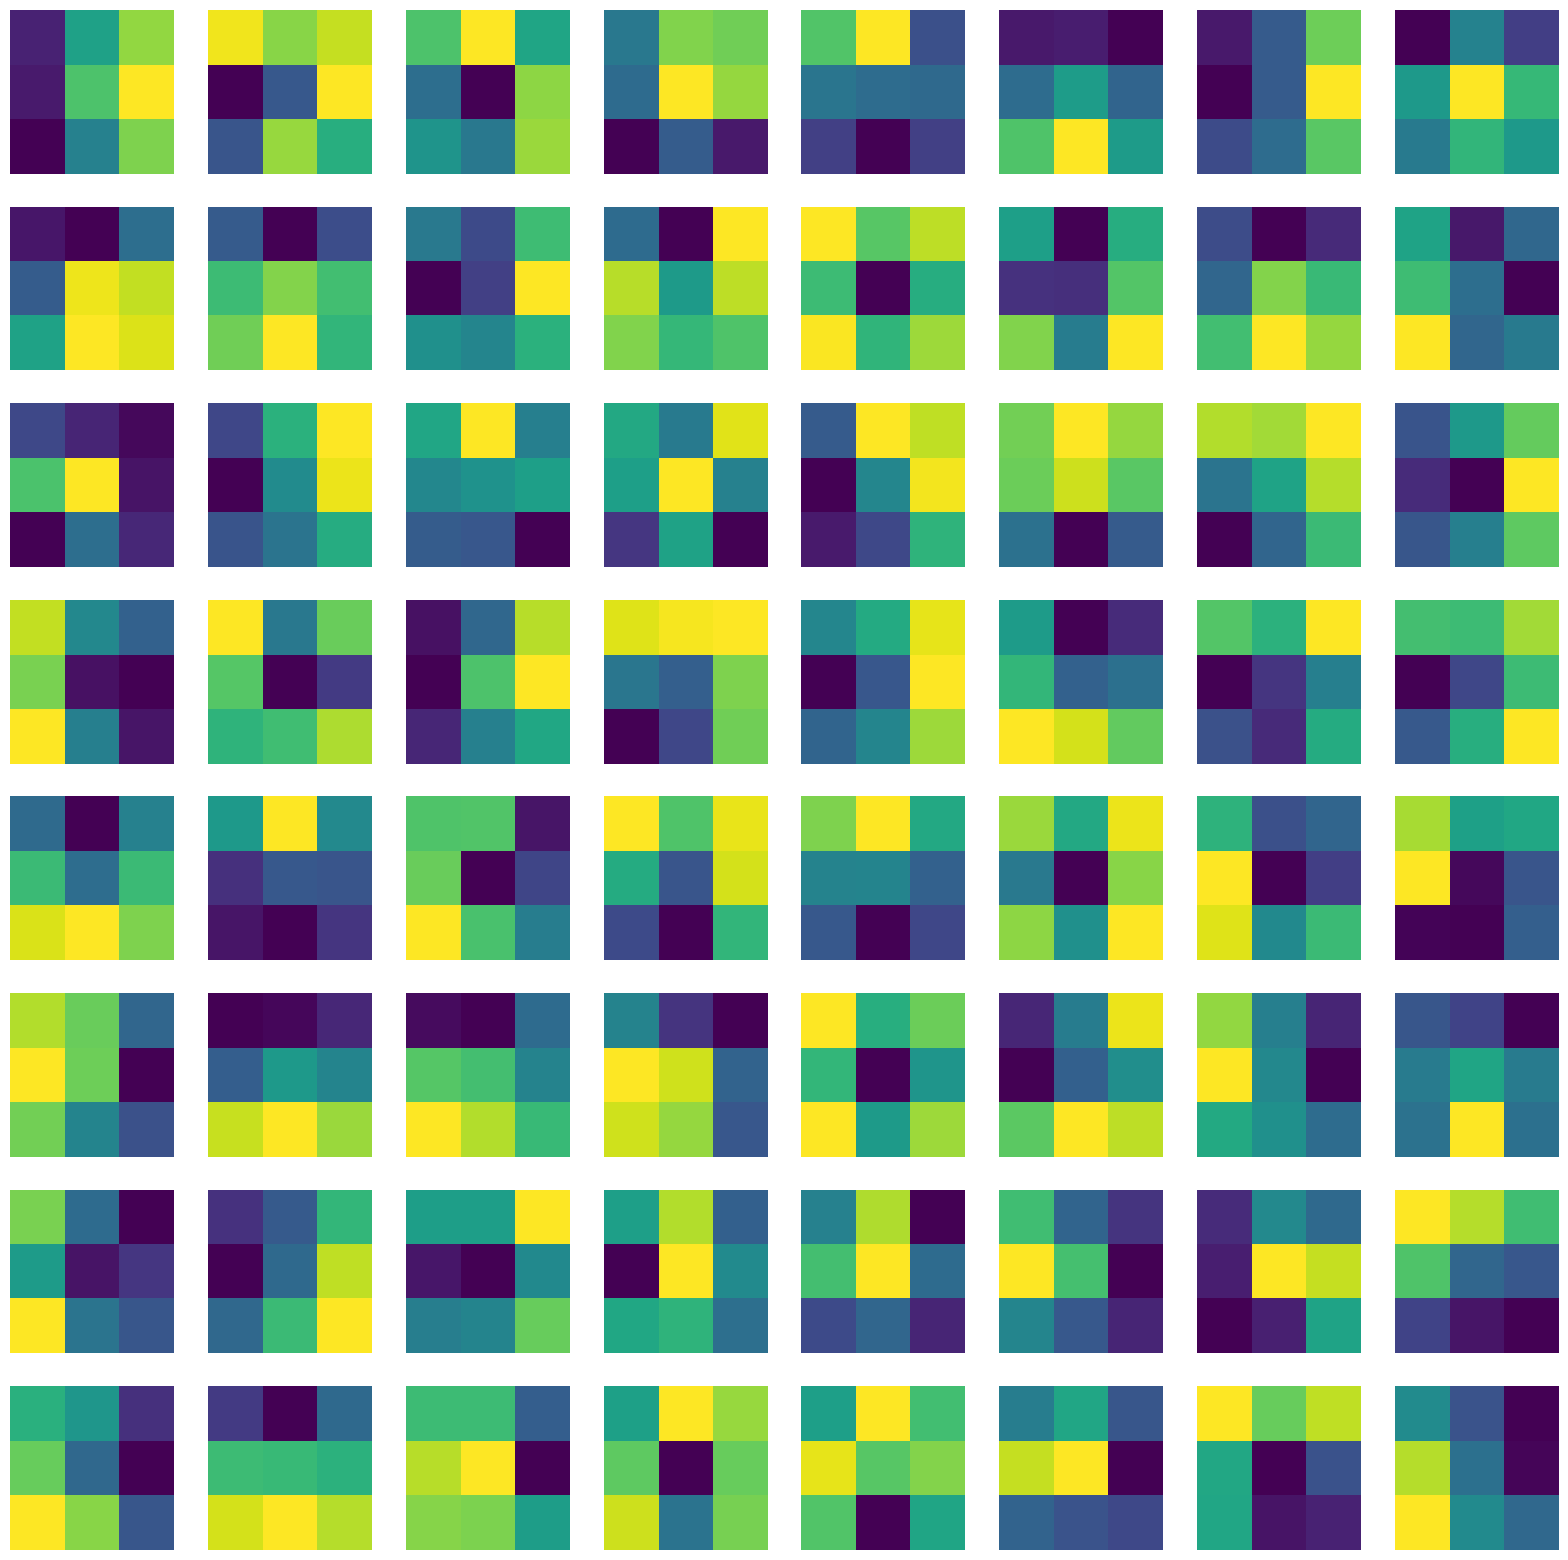

In [23]:
image = torch.from_numpy(x).float()

filter_map(model, image, 'conv_1')

#### Mapas de características de una red preentrenada.

In [24]:
# Function to visualize the feature (activation) maps of a CNN

def feature_map(model, image, layer='conv_1'):
  layers = {'conv_1': 1, 'conv_2': 3, 'conv_3': 6,
          'conv_4': 8, 'conv_5': 11, 'conv_5': 13,
          'conv_6': 15, 'conv_7': 18, 'conv_8': 20,
          'conv_9': 22, 'conv_10': 25, 'conv_11': 27,
          'conv_12': 29}
  assert layer in layers, 'layer not found'

  feat_maps = model.features[:layers[layer]](image).detach().squeeze()
  num_feat_maps = feat_maps.size(0) if feat_maps.size(0) < 64 else 64
  plt.figure(figsize=(20, 20))
  for i in range(num_feat_maps):
    plt.subplot(num_feat_maps//8, 8, i+1)
    plt.imshow(feat_maps[i].detach().cpu().numpy(), cmap='viridis')
    plt.axis('off')
  plt.show()


Visualicemos los mapas de características de la 1ra convolución.

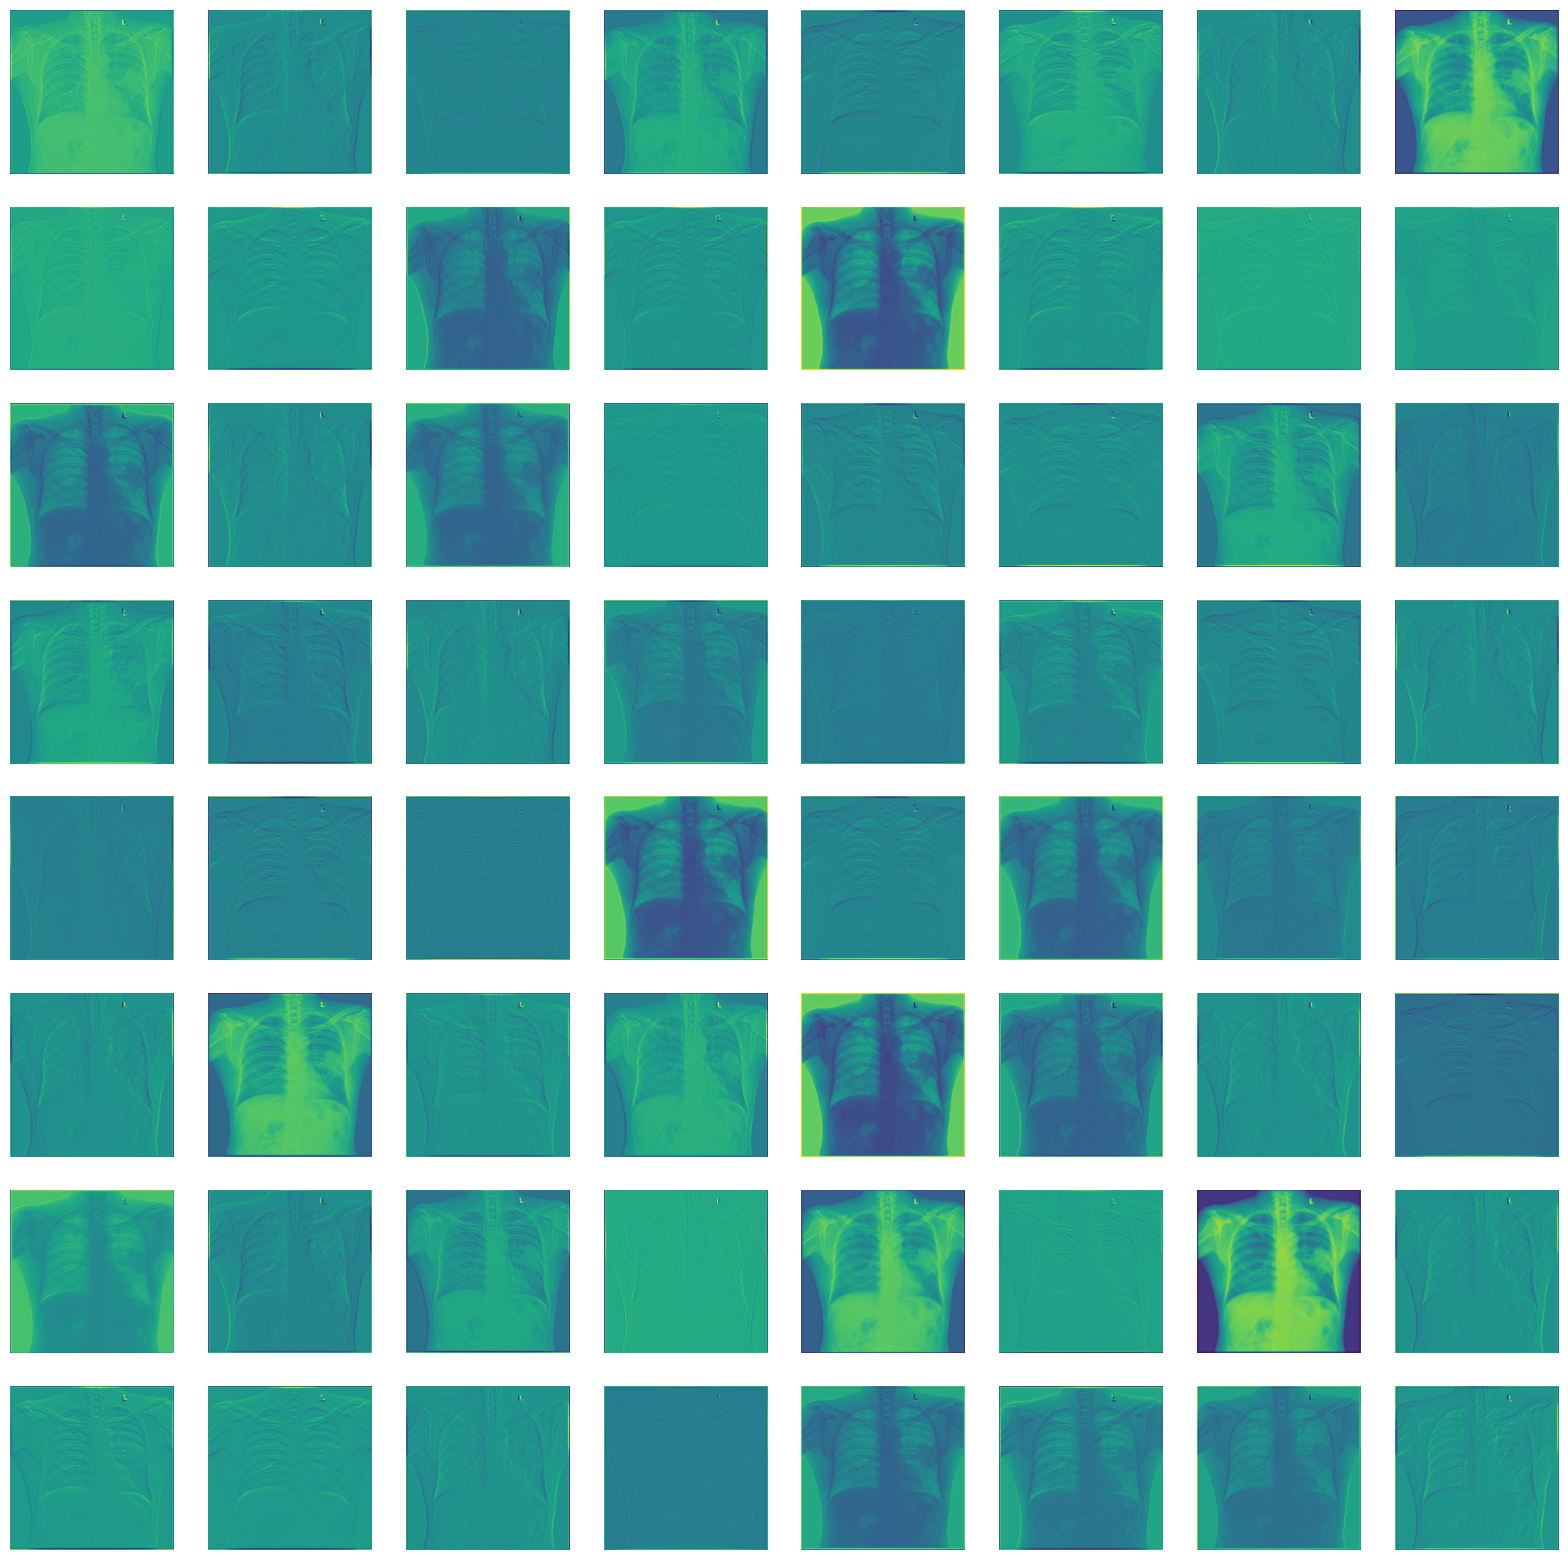

In [29]:
if device.type == 'cuda':
  image = torch.from_numpy(x).float().to('cuda')
else:
  image = torch.from_numpy(x).float()

feature_map(model, image, layer='conv_1')

Visualicemos los mapas de características de la convolución 11.

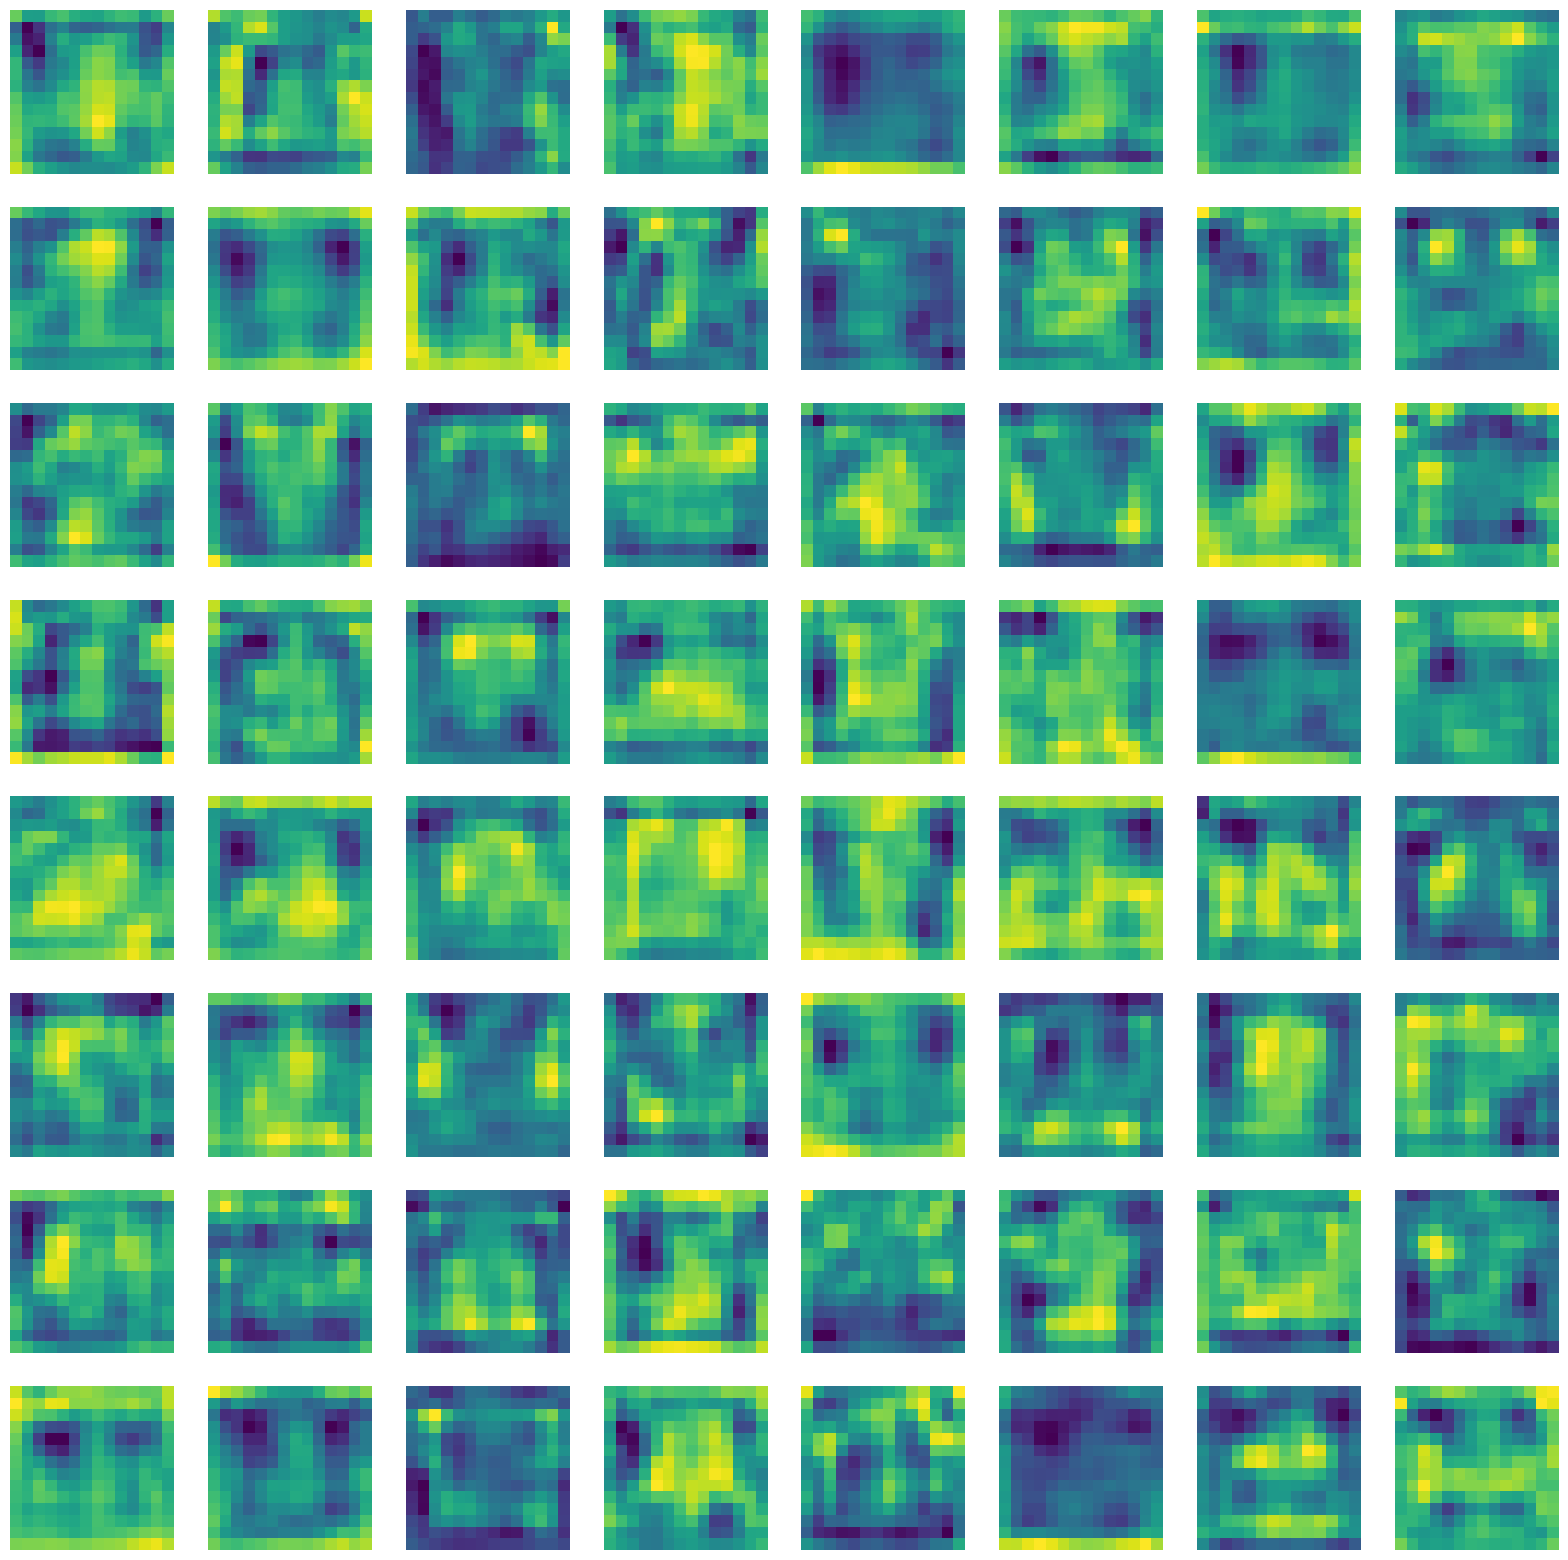

In [26]:
if device.type == 'cuda':
  image = torch.from_numpy(x).float().to('cuda')
else:
  image = torch.from_numpy(x).float()

feature_map(model, image, layer='conv_11')

**Actividad 2**: Visualizar mapas de características de otra imagen

In [30]:
# TODO: Utiliza los códigos anteriores para hacerlo

### Feature extraction with VGG

In [31]:
def extract_features(model, image, device):
    model_features = model.features
    features = model_features(torch.from_numpy(image).float().to(device)).flatten()
    if device.type == 'cuda':
        features = features.detach().cpu().numpy()
    else:
        features = features.detach().numpy()
    return features

In [34]:
feat = extract_features(model, x, device) # feature extraction from one image
feat

array([0., 0., 0., ..., 0., 0., 0.], shape=(25088,), dtype=float32)

**Actividad 3**:
1. Seleccionar 3 tipos de imágenes (clases) utlizando como referencia el archivo csv (dentro del directorio que contiene las imágenes). Una de ellas debe ser "no finding".
2. Aleatoriamente selecciona 1 imagen de cada tipo. Esta será llamada imagen de test y el resto se llamara train.
3. Calcula las características de todas las imágenes de train y almacénalas. Mantén un registro de la clase a la que pertenece cada imagen.
4. Calcula las caracterísitcas para las imágenes de test.
5. Calcula la diferencia entre una imagen test respecto a todas las imágenes train. Para ello utiliza la distancia euclidea.
6. Estima cuáles son las 3 imágenes más cercanas en el conjunto de imágenes train. La clase de la mayoría será la correspondiente a la imagen de test.
7. Verifica si la clase obtenida en el paso 6 corresponde con la clase original de la imagen de test.
8. Repite 5-7 para cada imagen de test.

Este método es una algoritmo de machine learning conocido como k-NN, k nearest neighbors. Donde k en nuestro caso es 3.

In [24]:
# TODO.